In [17]:
# Import the required modules
%matplotlib notebook
%pylab inline 
import cv2
import os
from IPython.display import clear_output
import datetime
import pickle as cPickle
import gzip

import numpy as np
%pylab inline 
import matplotlib.pyplot as pl
from IPython import display 

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
!apk update && apk upgrade
!pip3 install theano
import theano

fetch http://dl-cdn.alpinelinux.org/alpine/v3.5/main/x86_64/APKINDEX.tar.gz
fetch http://dl-cdn.alpinelinux.org/alpine/v3.5/community/x86_64/APKINDEX.tar.gz
fetch http://dl-cdn.alpinelinux.org/alpine/edge/testing/x86_64/APKINDEX.tar.gz
v3.5.2-225-g4d15b3991f [http://dl-cdn.alpinelinux.org/alpine/v3.5/main]
v3.5.2-213-g0860a961bc [http://dl-cdn.alpinelinux.org/alpine/v3.5/community]
v3.7.0_rc1-57-ge44f6bdd14 [http://dl-cdn.alpinelinux.org/alpine/edge/testing]
OK: 10673 distinct packages available
Upgrading critical system libraries and apk-tools:
(1/1) Upgrading apk-tools (2.6.8-r2 -> 2.6.9-r0)
7  0% [                                                                         ]87100% [#########################################################################]8Executing busybox-1.25.1-r0.trigger
Continuing the upgrade transaction with new apk-tools:
(1/13) Upgrading musl (1.1.15-r6 -> 1.1.15-r8)
7  0% [                                                                         ]8(2/13) Up

ImportError: No module named 'theano'

In [20]:
import theano
import theano.tensor as T
from theano.tensor.nnet import conv
from theano.tensor.nnet import softmax
from theano.tensor import shared_randomstreams
from theano.tensor.signal import downsample

# Activation functions for neurons
def linear(z): return z
def ReLU(z): return T.maximum(0.0, z)
from theano.tensor.nnet import sigmoid
from theano.tensor import tanh

ImportError: No module named 'theano'

In [3]:
trainingSet = 'TrainingSet'
employees = 'Employees'
rascals = 'Rascals'

In [4]:
scaleFactor = 1.2
minNeighbors = 5
faceWidth = 100
faceHeight = 100

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [6]:
# read id from reader
for i in range(0,100):
    # reading input from card reader
    cardId = input()
    # need to test
    cap = cv2.VideoCapture(-1)
    # stripping first zeroes (to proper id)
    cardId = str(int(cardId))
    # reading time
    currentTime = datetime.datetime.now()
    strTime = currentTime.strftime("%d.%m.%Y-%H:%M:%S")
    # Defined path to folder
    empPath = os.path.join(trainingSet, employees, cardId)    
    if not os.path.exists(empPath):
        os.makedirs(empPath)
    # Reading single frame
    # ret, frame = cap.grab()
    retr = cap.grab()
    ret, frame = cap.retrieve(retr)
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Detecting faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor, minNeighbors)
    for (x,y,w,h) in faces:
        if ( w >= faceWidth and h >= faceHeight ):
            cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            crop = frame[y:(y+w),x:(x+h)]
            res = cv2.resize(crop,dsize=(faceWidth,faceHeight), interpolation = cv2.INTER_CUBIC)
            cv2.imwrite(os.path.join(empPath, '%s.jpg' %strTime), res)
            # TODO remove displayment            
            imshow(gray)
            show()
    cap.release()
    # Display the frame until new frame is available
    clear_output(wait=True)    
    if cardId == 'quit':
        break

KeyboardInterrupt: 

In [ ]:
# print(shape(gray))
# print(x,y)
# crop = gray[y:(y+w),x:(x+h)]
# print(shape(frame))
# cv2.resize?
# print(shape(crop))
# # crop.resize(100,100)
# res = cv2.resize(crop,dsize=(100,100), interpolation = cv2.INTER_CUBIC)
# imshow(res)
# show()

In [ ]:
# cap.release()

In [ ]:
try:
    cap = cv2.VideoCapture(-1)
    while(1):
        # Capture frame-by-frame
        ret, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Detecting faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor, minNeighbors)
        for (x,y,w,h) in faces:
#             if ( w >= 200 and h >= 200 ):
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
#             roi_color = img[y:y+h, x:x+w]
#         imshow(frame)#cmap='Greys')
        imshow(frame)
        show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    cap.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")

In [ ]:
# rascalPath = os.path.join(trainingSet, rascals)
# for folder in os.listdir(rascalPath):
#     personPath = os.path.join(rascalPath, folder)
#     for personImage in os.listdir(personPath):
#         img = os.path.join(personPath, personImage)
#         frame = cv2.imread(img)
#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         faces = face_cascade.detectMultiScale(gray, scaleFactor, minNeighbors)
#         for (x,y,w,h) in faces:
#             if ( w >= 100 and h >= 100 ):
#                 cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
#                 roi_gray = gray[y:y+h, x:x+w]
#         imshow(frame)
#         show()
#         clear_output(wait=True)

In [7]:
baseDir = os.path.join(trainingSet,employees)
files = os.listdir(baseDir)

# files.sort()
# print(files)
trainingX = []
trainingY = []
# print(trainingY)
training = []

for folder in os.listdir(baseDir):
#     print(folder)
    idx = files.index(folder)
    personPath = os.path.join(baseDir, folder)
    for personImage in os.listdir(personPath):
#         print(personImage)
        img = os.path.join(personPath, personImage)
        nm = cv2.imread(img)
        nm = cv2.cvtColor(nm, cv2.COLOR_BGR2GRAY)
        nm = (nm - nm.mean())/(nm.std() + 1e-8)
#         imshow(nm)
#         show()
        imgB = np.asarray(nm).reshape(-1)
#         print(shape(imgB))
        trainingX.append(imgB)  
        y = np.zeros(len(files))
        y[idx] = 1
        trainingY.append(y)

training.append(trainingX)
training.append(trainingY)

In [8]:
print(shape(training))
# print(training[0])

(2, 228)


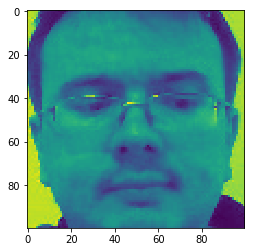

In [9]:
Xdisplay = np.reshape(training[0][0],(faceHeight,faceHeight))
imshow(Xdisplay)
show()

In [10]:
X = np.float32(training[0]) # to make float calc
print(shape(X))
print(X)

(228, 10000)
[[ 2.29186273  2.2398243   2.2138052  ..., -2.26148796 -2.23546886
  -2.20944953]
 [ 1.21582758  1.21582758  1.23606968 ..., -1.07152975 -1.03104556
  -1.05128765]
 [ 1.87881112  1.90167689  1.94740844 ...,  1.62728739  1.65015316
   1.62728739]
 ..., 
 [ 2.10569525  2.05643487  2.10569525 ...,  1.71161246  1.73624253
   1.71161246]
 [ 1.95149994  1.59222281 -1.13828337 ...,  1.0173794   1.06528294
   1.1131866 ]
 [ 1.90463579  1.90463579  1.83460939 ...,  1.04097712  1.01763499
   0.97095072]]


In [11]:
tmp = training[1]
training[1] = np.array(tmp)

In [12]:
# building simple fully connected net

In [13]:
class Neural_Network(object):
    def __init__(self,width,height):        
        self.inputLayerSize = width*height
        self.outputLayerSize = 2
        self.hiddenLayerSize1 = 1000
        self.hiddenLayerSize2 = 500

        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize1)
        self.W2 = np.random.randn(self.hiddenLayerSize1,self.hiddenLayerSize2)
        self.W3 = np.random.randn(self.hiddenLayerSize2,self.outputLayerSize)
        
    def forward(self, X):
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)        
        self.z3 = np.dot(self.a2, self.W2)
        
        self.a3 = self.sigmoid(self.z3)   
        self.z4 = np.dot(self.a3, self.W3)        
        yHat = self.sigmoid(self.z4)
        return yHat
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        return np.exp(-z)/((1+np.exp(-z))**2.0)
    
    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
#         dJdW1 = 0
#         dJdW2 = 0
#         print(shape(self.sigmoidPrime(self.z3)))
#         print(self.sigmoidPrime(self.z3))
#         print('--------------------')
#         print(y-self.yHat)
        delta4 = np.multiply(self.sigmoidPrime(self.z4), (y-self.yHat))        
        dJdW3 = np.dot(self.a3.T, delta4)
#         print('delta4', shape(delta4))
#         print('dJdW3', shape(dJdW3))
        
    
        delta3 = np.float32(np.dot(delta4, self.W3.T)*self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.float32(np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2))
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2, dJdW3
    
    def getParams(self):
        params = np.concatenate((self.W1.ravel(), self.W2.ravel(), self.W3.ravel()))
        return params
    
    def setParams(self, params):
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [14]:
# create exemplar
NN = Neural_Network(faceWidth,faceHeight)

In [15]:
print(shape(X))
print(shape(training[1]))

(228, 10000)
(228, 2)


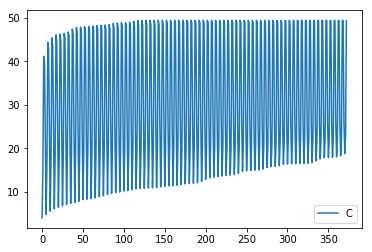

KeyboardInterrupt: 

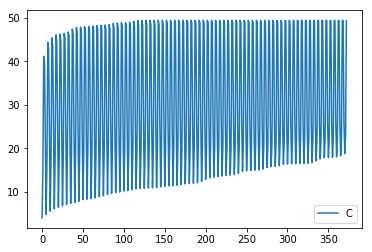

In [16]:
%matplotlib inline
costarr=[]
# num of iterations
for i in range(0,200):
    for j in range(0,len(training[0]),50):
        ybatch = training[1][j:j+50]
#         print(y)
#         y = y.T
#         print(shape(y))
        Xbatch = X[j:j+50]
#         print(shape(Xbatch))
        cost = NN.costFunction(Xbatch,ybatch)
        costarr.append(cost)
        dJdW1, dJdW2, dJdW3  = NN.costFunctionPrime(Xbatch,ybatch)
        scalar = 0.001
        NN.W1 = NN.W1 - scalar*dJdW1
        NN.W2 = NN.W2 - scalar*dJdW2
        NN.W3 = NN.W3 - scalar*dJdW3
#         print(costarr)
        plt.gca().cla() 
        plt.plot(costarr)
        plt.legend('Cost')
        display.clear_output(wait=True)
        display.display(plt.gcf()) 

In [ ]:
plot(costarr)
grid(1)
xlabel('Iterations')
ylabel('Cost')